# Chapter 2 지도 학습
## 2.1 분류와 회귀
#### 분류: 미리 정의된, 가능성 있는 여러 클래스 레이블 중 하나를 예측하는 것 - 이진분류, 다중분류
#### 회귀: 부동소수점을 예측하는 것

## 2.2 일반화, 과대적합, 과소적합
#### 모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련 세트에서 테스트 세트로 **일반화**되었다고 함
#### 가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대적합**이라고 함
#### 반대로 너무 간단한 모델이 선택되는 것을 **과소적합**이라고 함


## 2.3 지도 학습 알고리즘

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

X.shape: (26, 2)


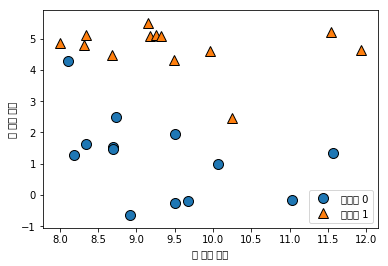

In [2]:
# 데이터셋을 만듦.
X, y = mglearn.datasets.make_forge()
# 산점도를 그림.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'타깃')

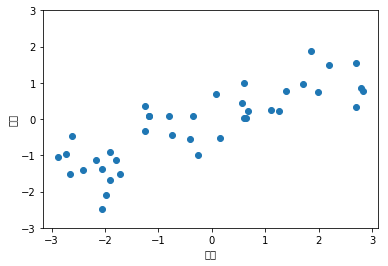

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [6]:
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-NN 알고리즘
#### 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용함

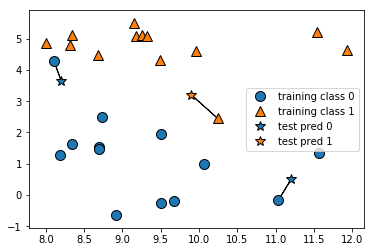

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

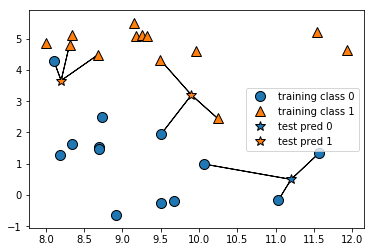

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### scikit-learn을 사용해서 k-NN 알고리즘을 어떻게 적용하는지 알아본다.
#### 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
# 훈련 세트를 사용하여 분류 모델을 학습시킨다.
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
# 테스트 데이터에 대해 예측한다.
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


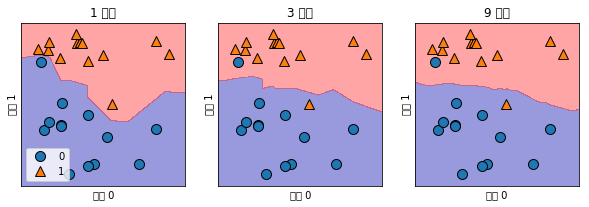

In [17]:
# KNeighborsClassifier 분석
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

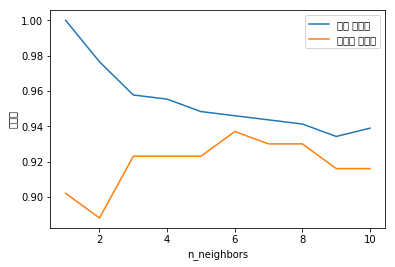

In [18]:
# 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴본다.
# 먼저 훈련 세트와 테스트 세트로 나누고, 이웃의 수를 달리 하여 훈련 세트와 테스트 세트의 성능을 평가한다.

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

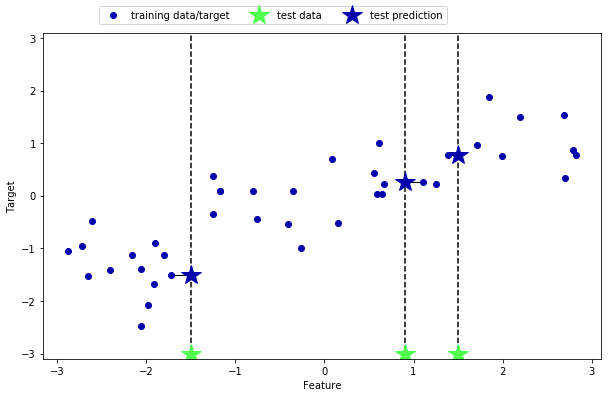

In [19]:
# k-NN 회귀
mglearn.plots.plot_knn_regression(n_neighbors=1)

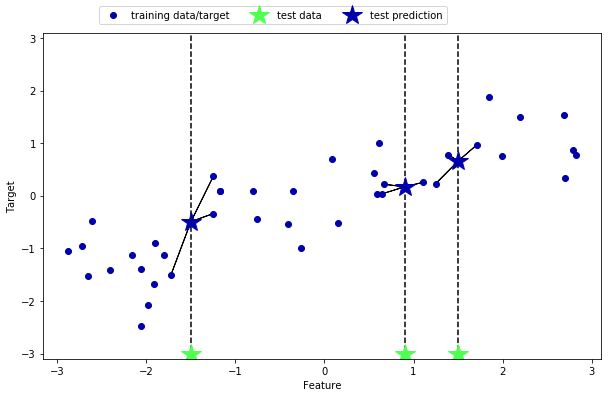

In [20]:
# 이웃을 둘 이상 사용한 회귀 분석
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
# scikit-learn에서 회귀를 위한 k-NN 알고리즘
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


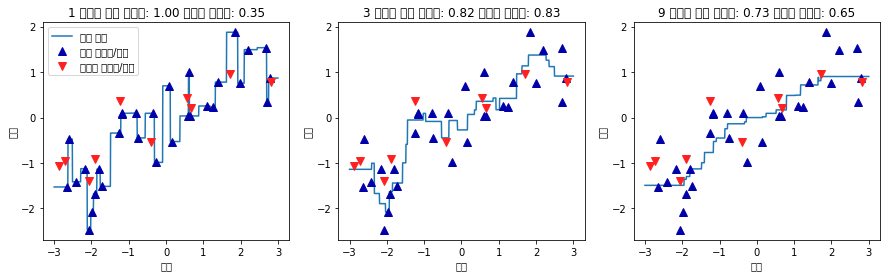

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듦.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}"
                 .format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

### 선형 모델

w[0]: 0.393906  b: -0.031804


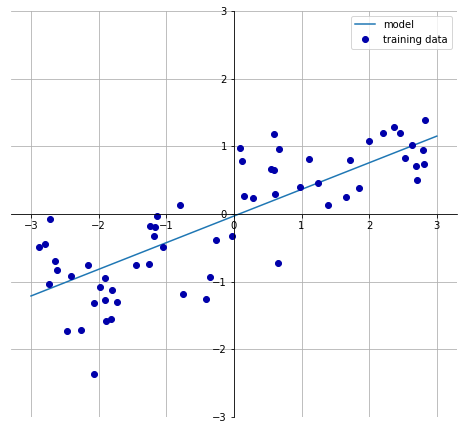

In [25]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)
#### 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터 w와 b를 찾는다.
#### 매개변수가 없는 것이 장점이지만, 그래서 모델의 복잡도를 제어할 방법도 없다.

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
# 기울기 파라미터(w)는 가중치 또는 계수라고 하며 lr.coef_에 저장되어 있음
print("lr.coef_: {}".format(lr.coef_))
# 편향 또는 절편 파라미터 (b)는 intercept_에 저장되어 있음
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [28]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [29]:
# LinearRegression 모델이 복잡한 데이터셋에서 어떻게 동작하는지 살펴본다.
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


#### => 이는 모델이 과대적합되었다는 신호이므로 복잡도를 제어할 수 있는 모델을 사용해야 함.
### 릿지 회귀
#### 가중치의 절댓값을 가능한 한 작게 만듦(모든 특성이 출력에 주는 영향을 최소한으로 만듦) -> 이런 제약을 규제라고 함

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [32]:
# alpha 매개변수 값을 높이면 계수를 0에 더 가깝게 만들어서
# 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있음
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


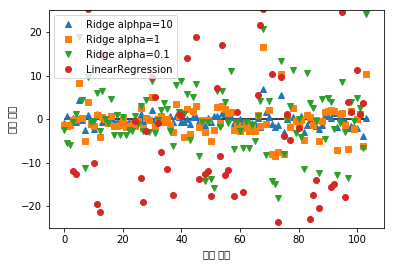

In [34]:
plt.plot(ridge10.coef_, '^', label="Ridge alphpa=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

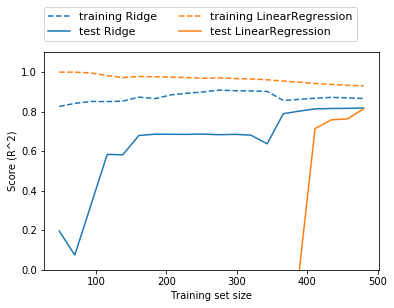

In [35]:
# alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 규제의 효과를 이해해본다.
mglearn.plots.plot_ridge_n_samples()

### 라쏘
#### 릿지 회귀에서와 같이 계수를 0에 가깝게 만들려고 함.(L1 규제)
#### 이의 결과로 계수가 0이 되는, 즉 완전히 제외되는 특성이 생김.

In [38]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [41]:
# 과소적합이 일어났으므로 alpha값을 줄인다.
# 이렇게 하려면 max_iter의 기본값을 늘려야 한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


In [42]:
# alpha값을 너무 낮추면 규제의 효과가 없어서 과대적합이 된다.
# 이는 LinearRegression의 결과와 비슷해짐을 의미한다.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 94


Text(0,0.5,'계수 크기')

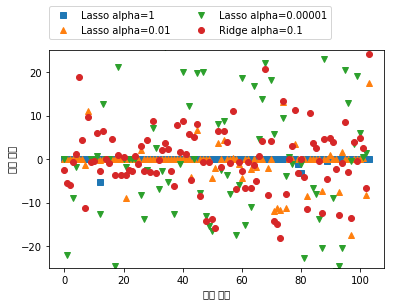

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.00001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

### 분류용 선형 모델
#### 이진 분류 - 선형 회귀 방정식과 아주 비슷한 방정식을 가지고 있지만 특성들의 가중치 합을 그냥 사용하는 대신 임계치 0과 비교함.
#### 회귀용 선형 모델에서는 출력 y_hat이 특성의 선형 함수 - 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수
#### (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.
#### 선형 모델을 학습시키는 알고리즘
> ####  1. 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
> ####  2. 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

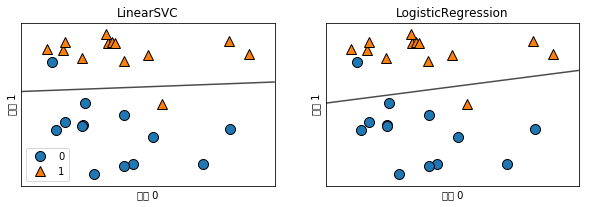

In [46]:
# 가장 널리 알려진 두 개의 선형 분류 알고리즘인 Logistic regression과
# LinearSVC를 이용해 결정 경계를 그림으로 나타내 본다.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

#### LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.
#### 